In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import init_printing; init_printing()

In [2]:
(x,L) = sympy.symbols('x,L')
(E,I) = sympy.symbols('E,I')
(N_1,N_2,N_3,N_4) = sympy.symbols('N_1,N_2,N_3,N_4')

## Define the four shape functions

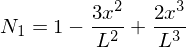

In [3]:
N1 = 1-3*(x/L)**2+2*(x/L)**3
sympy.Eq(N_1,N1)

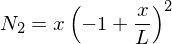

In [4]:
N2 = x*(x/L-1)**2
sympy.Eq(N_2,N2)

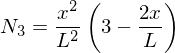

In [5]:
N3 = (x/L)**2*(3-2*(x/L))
sympy.Eq(N_3,N3)

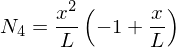

In [6]:
N4 = (x**2/L)*(x/L-1)
sympy.Eq(N_4,N4)

## Differentiate the shape functions with respect to x 

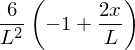

In [7]:
N1xx = N1.diff(x,2)
N1xx

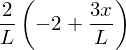

In [8]:
N2xx = N2.diff(x,2)
N2xx

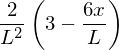

In [9]:
N3xx = N3.diff(x,2)
N3xx

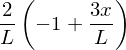

In [10]:
N4xx = N4.diff(x,2)
N4xx

## Define the integrand of stiffness matrix

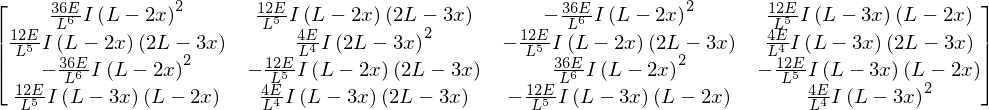

In [11]:
K = (E*I)*sympy.Matrix( [[N1xx*N1xx, N2xx*N1xx, N3xx*N1xx, N4xx*N1xx], [N1xx*N2xx, N2xx*N2xx, N3xx*N2xx, N4xx*N2xx], [N1xx*N3xx, N2xx*N3xx, N3xx*N3xx, N4xx*N3xx], [N1xx*N4xx, N2xx*N4xx, N3xx*N4xx, N4xx*N4xx]])
K.simplify()
K

##Integrate the stiffness matrix

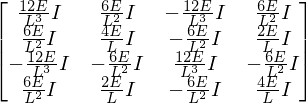

In [12]:
K = K.integrate((x,0,L))
K

## Define the integrand of the force vector

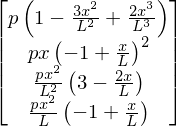

In [13]:
p = sympy.symbols('p')
F = p*sympy.Matrix([N1,N2,N3,N4])
F

## Integrate the force vector

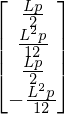

In [14]:
F = F.integrate((x,0,L))
F

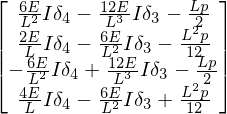

In [15]:
(delta1,delta2,delta3,delta4) = sympy.symbols('delta1,delta2,delta3,delta4')
system=K@sympy.Matrix([0,0,delta3,delta4])-F
system

## Solve for the unkown displacement and slope

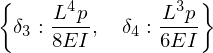

In [16]:
solution = sympy.solve( (system[2],system[3]),(delta3,delta4))
solution

## Express the finite element solution as a function of x using the interpolation functions

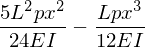

In [17]:
w_solution = sympy.Matrix([N1,N2,N3,N4]).dot(sympy.Matrix([0,0,solution[delta3],solution[delta4]]))
w_solution = w_solution.expand().collect(x)
w_solution

## Exact solution for a distributed load on a cantilever beam

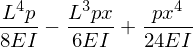

In [18]:
a_solution = ((p*L**4)/(24*E*I))*(x**4/L**4-(4*x)/L+3)
a_solution = a_solution.expand().collect(x)
a_solution

In [19]:
position = []
fe = []
analytic = []
for pos in np.linspace(0,10):
    position.append(pos)
    fe.append(-(w_solution.subs({I:1.0e-4,E:1e6,x:pos,L:10,p:10})))
    analytic.append(-(a_solution.subs({I:1e-4,E:1e6,x:10-pos,L:10,p:10})))
    

## Comparison between FE solution and the exact solution

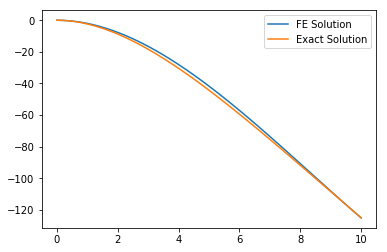

In [20]:
plt.plot(position,fe,label='FE Solution')
plt.plot(position,analytic,label='Exact Solution')
plt.legend(loc='best')
